In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Read the dataset to the python environment.

In [114]:
data = pd.read_excel(r'C:\Users\GOKUL BABU K\Downloads\iris (1).xls')

In [115]:
#checking data is imported to Python environment by printing the data.
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

In [116]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [117]:
# Checking for the null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

- Insight
- SL, SW and PL columns having missing values

# Filling missing values

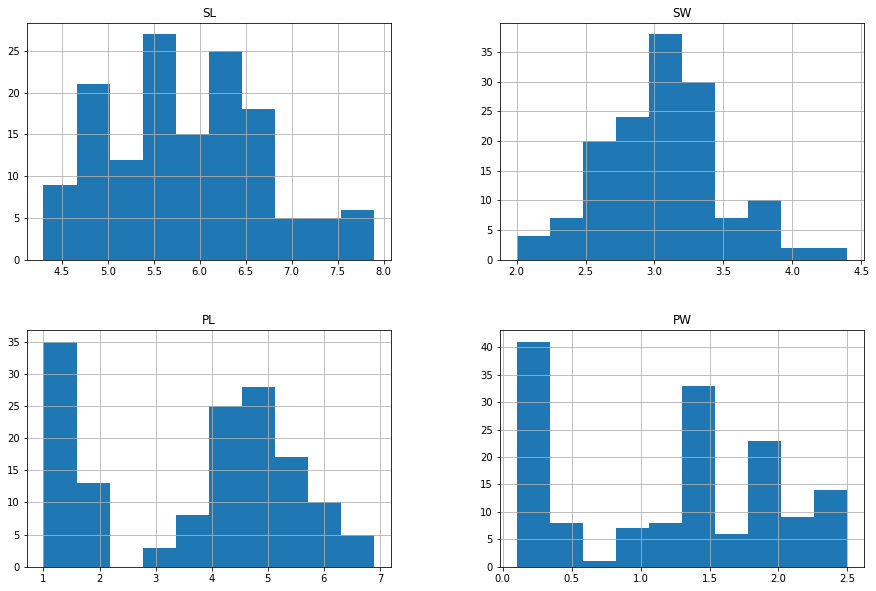

In [118]:
# Plotting column for finding the kind of distribution
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,10))
plt.show()

- Insight : All are normally distributed and we can fill the missing values with mean\median\mode

In [119]:
# Filling missing values with median
data['SL']=data['SL'].replace(np.NaN,data['SL'].median())
data['SW']=data['SW'].replace(np.NaN,data['SW'].median())
data['PL']=data['PL'].replace(np.NaN,data['PL'].median())

In [120]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Outlier handling

C:\Users\GOKUL BABU K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SL'>

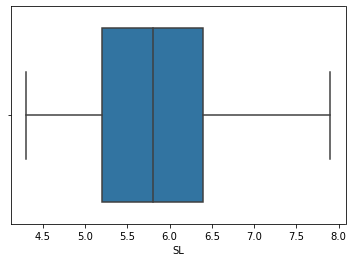

In [122]:
# Visualization of "SL" column with box plot
sns.boxplot(data['SL'],data=data)

- Insight: No outliers

C:\Users\GOKUL BABU K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SW'>

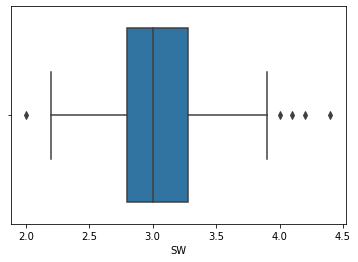

In [123]:
# Visualization of "SW" column with box plot
sns.boxplot(data['SW'],data=data)

In [124]:
# Finding inter quartile rage to identify the upper and lower limit to omit the outliers
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1

In [125]:
IQR

0.4500000000000002

In [126]:
#Upper and lower limits are finding to remove the outliers
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
print("Lower limit is",lower_limit)
print("Upper limit is",upper_limit)

Lower limit is 2.1249999999999996
Upper limit is 3.9250000000000003


In [127]:
# Finding the index of the values which are outside the limit
index=data['SW'][(data['SW']>upper_limit)|(data['SW']<lower_limit)].index
data.drop(index,inplace=True)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


C:\Users\GOKUL BABU K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SW'>

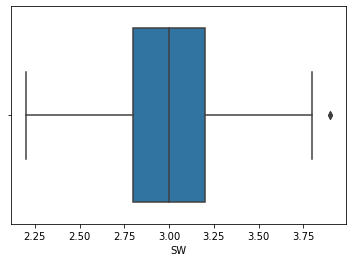

In [129]:
# Visualization of "SW" column with box plot
sns.boxplot(data['SW'],data=data)

C:\Users\GOKUL BABU K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PL'>

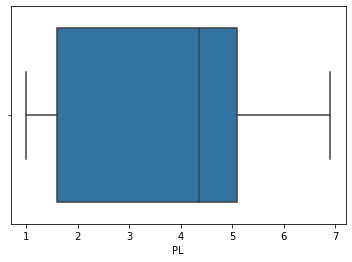

In [130]:
# Visualization of "PL" column with box plot
sns.boxplot(data['PL'],data=data)

- Insight : No outliers

# Encoding

In [131]:
#finding the number of values in dependend feature
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [132]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.2 KB


In [134]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 3. Find out which classification model gives the best result to predict iris species


# 1. Logistic Regression

In [135]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 

In [137]:
from sklearn import preprocessing
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
x_test= min_max.fit_transform(x_test)
x_train= min_max.fit_transform(x_train)

In [138]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [139]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [140]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0  8  3]
 [ 0  0 11]]


0.918918918918919

# 2. K Nearest neighbour

In [141]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0 10  1]
 [ 0  0 11]]


0.972972972972973

# 3. SVM

In [143]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [144]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0 10  1]
 [ 0  0 11]]


0.972972972972973

# 4. Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [146]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0  6  5]
 [ 0  0 11]]


0.8648648648648649

# 5. Random Forest 

In [147]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [148]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0 10  1]
 [ 0  1 10]]


0.9459459459459459

# 6. Kernal SVM

In [149]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [150]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0 10  1]
 [ 0  0 11]]


0.972972972972973

- Insight : Random Forest Classifier is having highest accuracy value 0.9729 for the dataset